# KNN

### 有这样一个数据集（一系列电影）

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210310140051193.png)

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210310140150915.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210310140341343.png)

In [1]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
filename = './datingTestSet.txt'


In [10]:
import pandas as pd
pd.read_table(filename, header=None, names=['A','B', 'C']).reset_index(drop=False)

,index,A,B,C
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


三种特征：
   1. 每年飞行里程数
   2. 玩游戏所好时间
   3. 每周消费的冰淇淋公升数


分类结果：
   1. 不喜欢的人 didntLike
   2. 魅力一般的人 smallDoses
   3. 极具魅力的人 largeDoses

## 最大最小归一化
### newValue = (oldValue - min) / (max - min)

# K-Means

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [4]:
data = pd.read_csv("./abcnews-date-text.csv", error_bad_lines=False, usecols =["headline_text"])
data.head()  

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1226258 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


## 1.1 删除重复数据¶

In [6]:
# 查看重复的数据行，pandas.DataFrame.duplicated 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
57967,10 killed in pakistan bus crash
116298,10 killed in pakistan bus crash
676423,110 with barry nicholls
672958,110 with barry nicholls
911080,110 with barry nicholls
748629,110 with barry nicholls
826828,110 with barry nicholls episode 15
897042,110 with barry nicholls episode 15


In [7]:
# 删除重复行，pandas.DataFrame.drop_duplicates 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
########## 第一题 ～ 1行 ##########
######### your code #########
data = data.drop_duplicates('headline_text')
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


# 2 数据预处理

## 2.1 为向量化表示进行前处理
进行自然语言处理时，必须将单词转换为机器学习算法可以利用的向量。如果目标是对文本数据进行机器学习建模，例如电影评论或推文或其他任何内容，则需要将文本数据转换为数字。此过程称为“嵌入”或“向量化”。  
进行向量化时，请务必记住，它不仅仅是将单个单词变成单个数字。单词可以转换为数字，整个文档就可以转换为向量。向量的维度往往不止一个，而且对于文本数据，向量通常是高维的。这是因为特征数据的每个维度将对应一个单词，而我们所处理的文档通常包含数千个单词。

## 2.2 TF-IDF
在信息检索中，tf–idf 或 TFIDF（term frequency–inverse document frequency）是一种数值统计，旨在反映单词对语料库中文档的重要性。在信息检索，文本挖掘和用户建模的搜索中，它通常用作加权因子。 tf-idf 值与单词在文档中出现的次数成正比，同时被单词在语料库中的出现频率所抵消，这有助于调整某些单词通常会更频繁出现的事实。 如今，tf-idf是最流行的术语加权方案之一。在数字图书馆领域，有83％的基于文本的推荐系统使用tf-idf。

搜索引擎经常使用tf–idf加权方案的变体作为在给定用户查询时对文档相关性进行评分和排名的主要工具。tf–idf可成功用于各种领域的停用词过滤，包括文本摘要和分类。

排名函数中最简单的是通过将每个查询词的tf–idf相加得出，许多更复杂的排名函数是此简单模型的变体。

> TF-IDF（Term Frequency-inverse Document Frequency）是一种针对关键词的统计分析方法，用于评估一个词对一个文件集或者一个语料库的重要程度。一个词的重要程度跟它在文章中出现的次数成正比，跟它在语料库出现的次数成反比。

>  一个词在语料库中的 TF-IDF = TF * IDF

>> TF = 词频 / 当前文档中所有词的数量  
IDF = log{ 所有文档的总数 / （包含该词有多少个文档数量+1）}


举个例子： 数据集中一共有两个文档  
【我 可 太喜欢 姚明 了】，【谁 的 老婆 是 叶莉 啊】，【叶莉 有 一个 女儿 和 一个 儿子】  


【我 可 太喜欢 姚明 了】 中的 “姚明” TF-IDF = ？  


In [8]:
# 举个例子！
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


vectorizer = TfidfVectorizer()
tdm = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names()) 

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [9]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]

#
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

# 
desc = data['headline_text'].values
############ 第二题 ～ 1行 ############
############ your code start ############
# TfidfVectorizer 使用方法详见：http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# 
vectorizer = TfidfVectorizer(stop_words = stop_words)
############ your code end ############
# 
X = vectorizer.fit_transform(desc)

In [10]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

104399
['afpa', 'afpla', 'afps', 'afr', 'afraid', 'afrcia', 'afresh', 'afri', 'afric', 'africa', 'african', 'africans', 'africanus', 'africas', 'africaspotted', 'africulture', 'afrid', 'afridi', 'afrikaners', 'afrin', 'afro', 'aft', 'aftaid', 'afte', 'after15', 'afterabseiling', 'afterbirth', 'aftercompany', 'afterdark', 'afterfavourites', 'afterglow', 'afterlife', 'aftermarket', 'aftermath', 'afternoon', 'afternoons', 'afterparty', 'afterpay', 'afterschool', 'aftershock', 'aftershocks', 'aftertaste', 'afterthought', 'afterwoman', 'afterwork', 'aftr', 'aftrica', 'afw', 'afwl', 'ag', 'aga', 'agai', 'againon', 'agains', 'againsthim', 'againt', 'againts', 'agaisnt', 'agalarov', 'aganst', 'aganstwawrinka', 'agant', 'agapanthus', 'agape', 'agar', 'agarkar', 'agars', 'agarwal', 'agassi', 'agassis', 'agata', 'agatha', 'agave', 'agc', 'agca', 'agchatoz', 'agconnectwa', 'agd', 'agdata', 'age', 'agea', 'agebt', 'aged', 'agein', 'ageing', 'ageings', 'ageism', 'ageist', 'ageless', 'agels', 'agen',

## 2.3 Stemming
stemming 是将单词还原为词干（即词根形式）的过程。 词根形式不一定是单词本身，而是可以通过连接正确的后缀来生成单词。 例如，“fish”，“fishes”和“fishing”这几个词的词干都是“fish”，这是一个正确的单词。 另一方面，“study”，“studies”和“studying”一词源于“studi”，这不是一个正确的英语单词。

## 2.4 Tokenizing
Tokenization 将句子分解为单词和标点符号

In [11]:
# 列表推导式


In [12]:
# jieba分词


In [13]:
# 词干还原
stemmer = SnowballStemmer('english')  # SnowballStemmer 使用方法详见： https://www.kite.com/python/docs/nltk.SnowballStemmer
# Tokenizer 分词
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')  #  RegexpTokenizer 使用方法详见： https://www.kite.com/python/docs/nltk.RegexpTokenizer

def tokenize(text):
    """先进行 stemming 然后 tokenize
    params:
    text: 一个句子
    
    return:
    tokens 列表
    """
    ############ 第三题 ～ 1行 （使用列表推导） ############ 
    ############ your code start ############
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
    ############ your code end ############

## 2.5  使用停用词、stemming 和自定义的 tokenizing 进行 TFIDF 向量化

In [14]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


72395
["'a", "'i", "'s", "'x", 'aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadhaar', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abacus', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon']


In [15]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

# 3 K-Means 聚类

## 3.1 使用手肘法选择聚类簇的数量
随着聚类数k的增大,样本划分会更加的精细,每个簇的聚合程度会逐渐提高,那么误差平方和SSE自然会逐渐变小,并且当k小于真实的簇类数时,由于k的增大会大幅增加每个簇的聚合程度,因此SSE的下降幅度会很大,而当k到达真实聚类数时,再增加k所得到的聚合程度回报会迅速变小,所以SSE的下降幅度会骤减,然后随着k值的继续增大而趋于平缓,也就是说SSE和k的关系类似于手肘的形状,而这个肘部对应的k值就是数据的真实聚类数.因此这种方法被称为手肘法.

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210310152443174.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MTI4NzA2MA==,size_16,color_FFFFFF,t_70)

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210310152524438.png)

> Ci是第i个簇  
> p是Ci中的样本点  
> mi是Ci的质心（Ci中所有样本的均值）  

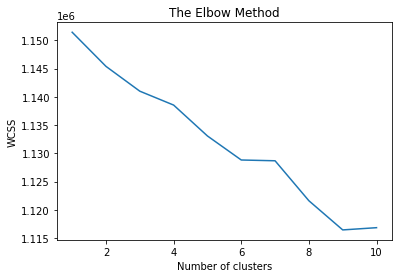

In [16]:
from sklearn.cluster import KMeans  # 使用方法详见： http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
wcss = []
for i in range(1,11):
    ############ 第四题 ～ 1行 （初始化 KMeans） ############ 
    ############ your code start ############     
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    ############ your code end ############
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [17]:
print(words[250:300])

['decid', 'decis', 'declar', 'defenc', 'defend', 'delay', 'deliv', 'demand', 'deni', 'despit', 'destroy', 'detent', 'develop', 'die', 'director', 'disabl', 'disast', 'discuss', 'diseas', 'dismiss', 'disput', 'doctor', 'dog', 'dollar', 'domest', 'donald', 'donat', 'doubl', 'doubt', 'draw', 'dri', 'drink', 'drive', 'driver', 'drop', 'drought', 'drown', 'drug', 'drum', 'dump', 'dure', 'eagl', 'earli', 'eas', 'east', 'econom', 'economi', 'edg', 'educ', 'effort']


## 3.2 Clusters 等于 3

In [18]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
# argsort 使用方法详见： https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


0 : polic, man, say, charg, plan, murder, court, death, assault, face, investig, drug, arrest, attack, jail, car, miss, stab, crash, shoot, woman, offic, kill, probe, search
1 : new, zealand, law, year, plan, open, council, polic, case, australia, home, hospit, centr, set, deal, hope, announc, south, look, appoint, record, say, coronavirus, minist, wa
2 : win, australia, council, australian, govt, report, kill, court, warn, nsw, fund, urg, water, open, year, death, chang, sydney, crash, interview, day, wa, elect, face, claim


## 3.3 Clusters 等于 5

In [19]:
############ 第五题 ############ 
# 重复上面的做法，仅改变聚类簇的数量 (尝试将上述过程封装成一个函数，减少代码的重读性，方便传参调用)
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


0 : new, say, plan, council, govt, urg, fund, water, law, consid, zealand, nsw, chang, qld, group, wa, health, minist, report, develop, need, govern, hospit, sa, centr
1 : australia, day, south, coronavirus, test, new, world, cup, cricket, india, china, say, live, win, vs, covid, western, england, zealand, ash, post, central, pakistan, lead, africa
2 : man, kill, charg, jail, murder, crash, court, attack, car, die, stab, face, accus, guilti, bomb, arrest, assault, death, miss, woman, accid, blast, shoot, child, injur
3 : polic, investig, man, probe, offic, search, arrest, hunt, death, miss, car, charg, shoot, drug, attack, assault, murder, say, seek, crash, driver, suspect, fatal, raid, woman
4 : win, australian, court, charg, report, warn, nsw, death, face, open, sydney, year, water, interview, fund, chang, wa, elect, crash, hit, urg, world, claim, day, hous


## 3.4 Clusters 等于 6

In [20]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


0 : new, man, plan, charg, council, court, kill, face, murder, jail, accus, crash, attack, assault, car, woman, death, drug, stab, zealand, child, guilti, sex, case, die
1 : say, polic, need, minist, govt, expert, trump, mp, plan, union, australia, council, labor, report, govern, wont, public, group, new, opposit, pm, chang, health, time, wa
2 : polic, investig, man, probe, offic, search, hunt, arrest, charg, car, miss, death, shoot, drug, assault, murder, seek, attack, crash, driver, suspect, fatal, raid, station, woman
3 : win, australia, australian, report, warn, nsw, open, interview, year, death, water, fund, day, chang, world, elect, wa, hit, claim, crash, set, health, qld, hous, test
4 : govt, urg, fund, plan, council, qld, nsw, vic, water, wa, public, consid, local, help, act, sa, chang, boost, accus, reject, nt, support, report, health, farmer
5 : sydney, man, hobart, polic, western, charg, shoot, harbour, airport, hous, arrest, stab, west, nsw, south, home, win, woman, leagu, 

## 3.5 Clusters 等于 8

In [21]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


0 : plan, australia, council, govt, report, warn, urg, nsw, fund, water, chang, rural, climat, boost, health, consid, govern, qld, south, cut, farmer, public, group, reject, resid
1 : win, australian, kill, court, open, interview, crash, sydney, death, world, elect, hit, claim, attack, wa, day, hous, set, die, home, final, qld, hospit, test, cup
2 : face, court, charg, man, accus, trial, murder, drug, ban, alleg, challeng, new, death, child, assault, sex, woman, futur, tough, polic, final, water, teen, test, fine
3 : say, polic, need, govt, minist, expert, trump, mp, plan, union, australia, council, report, labor, govern, wont, public, group, opposit, pm, new, chang, health, time, lawyer
4 : man, charg, murder, jail, assault, stab, court, die, guilti, death, drug, woman, arrest, attack, child, crash, kill, car, sex, accus, miss, alleg, plead, sydney, teen
5 : year, old, jail, new, celebr, sentenc, australian, man, end, mark, murder, high, low, record, sign, polic, profit, hit, woman, f

# 逻辑回归

## 导入项目相关库
&emsp;&emsp;我们需要使用pandas进行数据处理，使用sklearn进行数据划分、标准化、模型预测等操作，使用matplotlib绘制相关图表。<br>

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 导入数据
&emsp;&emsp;数据文件已保存在'./heart.csv'，我们可以使用read_csv函数将数据集读到内存中。<br>

In [23]:
dataPath = './heart.csv'
data = pd.read_csv(dataPath)

## 了解数据集
&emsp;&emsp;首先让我们来看看数据内容，以便对数据集有个初步了解。

In [24]:
# 使用.head()函数可以查看数据集的头部数据
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# 使用.info()函数可以查看数据集的主要信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
# 使用.describe()函数可以查看数据的统计信息
# 统计信息包括总数、均值、方差、最小值、第一四分位数、第二四分位数、第三四分位数、最大值。
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x7fe5cdbff550>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

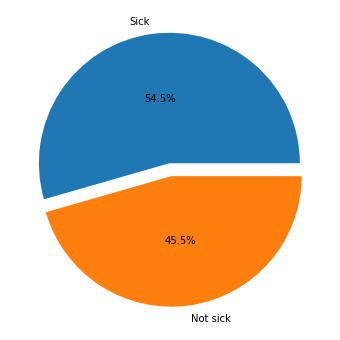

In [27]:
# 下面我们来看一看303人里有多少人被确诊为病患。
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=['Sick', 'Not sick'], pctdistance=0.5)

*Tips：一般来说，在数据处理或模型预测之前，我们可以检查一下各项特征的相关系数，如果有两个特征之间的相关系数极高，则代表这两个特征内容高度重复，或许可以在特征筛选的时候删除其一；如果某个特征与被预测项之间的相关系数极高，则代表这个特征很重要，需要保留。*

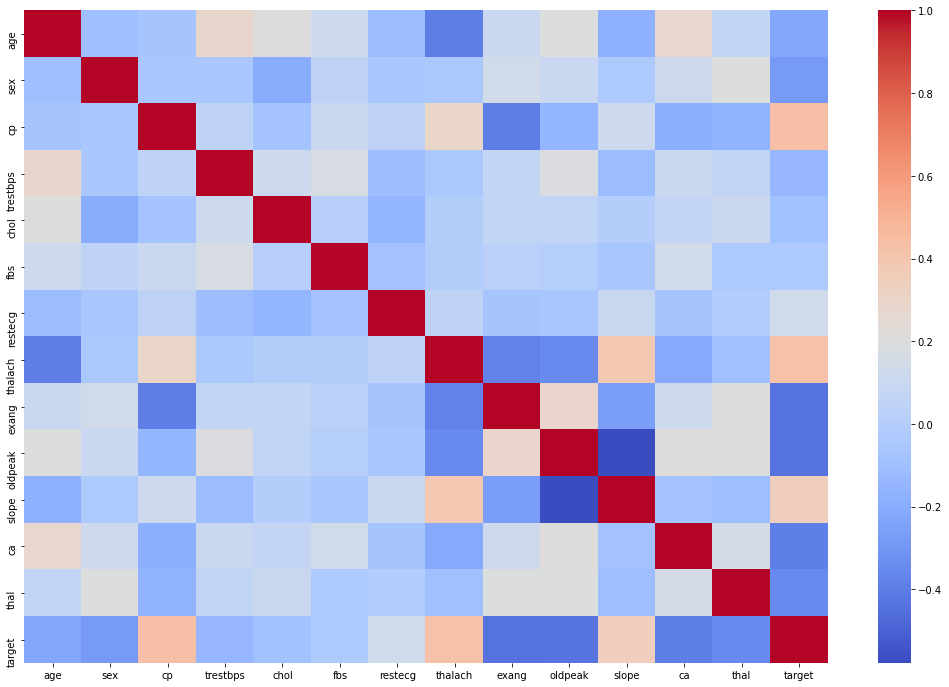

In [28]:
# 查看特征相关系数图
# 颜色越暖代表相关系数越高；颜色越冷代表相关系数越低。
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(data.corr(),ax= ax, cmap='coolwarm');

In [29]:
# 查看特征之间的相关系数具体数值
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 数据处理
### 问题1：Onehot编码
&emsp;&emsp;请对data数据中需要进行Onehot的特征列，进行Onehot编码处理。<br>

In [30]:
# TODO：Onehot编码
data = pd.get_dummies(data, columns=['cp','restecg','slope','thal'])

### 打印数据info，查看数据列变化。

In [31]:
# TODO：打印数据info，查看Onehot编码是否成功
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   target     303 non-null    int64  
 10  cp_0       303 non-null    uint8  
 11  cp_1       303 non-null    uint8  
 12  cp_2       303 non-null    uint8  
 13  cp_3       303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  slope_0    303 non-null    uint8  
 18  slope_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  thal_0    

### 问题2：数据、标签划分
&emsp;&emsp;请对data数据进行标签划分，划分出x_data（Data）与y_data(Laber)。<br>

In [32]:
# TODO：将data数据划分为x_data（Data）与y_data(Laber)
x_data = data.drop(['target'],axis=1)
y_data = data.target.values

### 问题3：归一化处理
&emsp;&emsp;请对所有数据列进行归一化处理。<br>

In [33]:
# TODO：对x_data进行归一化处理
standardScaler = StandardScaler()
standardScaler.fit(x_data)
X_train = standardScaler.transform(x_data)

### 问题4：训练、测试集划分
&emsp;&emsp;请对数据与标签进行训练集、测试集划分，划分比例为：测试集占30%。<br>

In [34]:
# TODO：将x_data、y_data划分成X_train,X_test,y_train,y_test，其中test占30%。
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=33)

### 问题5：模型定义、训练及评估
&emsp;&emsp;请完成LogisticRegression模型的定义、训练及评估。<br>

In [35]:
# TODO：请定义一个LogisticRegression模型
model = LogisticRegression(max_iter=1000)

In [36]:
# TODO：请使用训练数据对LogisticRegression模型进行训练
model.fit(X_train,y_train)

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [37]:
# TODO：请使用训练数据对模型进行评估
model.score(X_train,y_train)

0.8773584905660378

In [38]:
# TODO：请使用测试数据对模型进行评估
model.score(X_test,y_test)

0.8461538461538461

### 问题6：检查主要评价指标
&emsp;&emsp;请使用主要评价指标对模型进行评价。<br>

In [39]:
# TODO：请使用X_test数据进行模型预测
y_predict = model.predict(X_test)

In [40]:
# TODO：请使用主要评价指标对模型进行评价
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.80      0.88      0.84        41

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

